In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:/Users/go27s/OneDrive/Documents/Udemy/Statistics and Probability/Statistics/Boston_crime.csv", encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
df['YEAR'].unique()

array([2020, 2019, 2018, 2016], dtype=int64)

In [10]:
# do analysis on 2 selected years only: 2019, 2018 because 2020 and 2016 might not be complete

In [12]:
df = df.loc[df['YEAR'].isin([2018, 2019])]

In [13]:
df = df.loc[df['UCR_PART'] == 'Part One']

In [15]:
df.shape

(37538, 16)

In [17]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [18]:
# convert day_of_week to categorical(text columns, which are repetitive) data format

In [19]:
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                                                  'Saturday', 'Sunday'], ordered=True)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,I182064766,617,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,I182064449,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,I182063310,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,I182057388,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,I182055406,617,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


In [21]:
df.dtypes

INCIDENT_NUMBER          object
OFFENSE_CODE              int64
OFFENSE_CODE_GROUP       object
OFFENSE_DESCRIPTION      object
DISTRICT                 object
REPORTING_AREA           object
SHOOTING                 object
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK            category
HOUR                      int64
UCR_PART                 object
STREET                   object
Lat                     float64
Long                    float64
Location                 object
dtype: object

In [22]:
# drop incident_number, offence_code because they don't add any value

In [26]:
df.drop(columns=['INCIDENT_NUMBER', 'OFFENSE_CODE'], inplace=True)
df.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


# Visualise the serious crimes in Boston

In [27]:
df['OFFENSE_CODE_GROUP'].value_counts().index

Index(['Larceny', 'Larceny From Motor Vehicle', 'Aggravated Assault',
       'Residential Burglary', 'Auto Theft', 'Robbery', 'Commercial Burglary',
       'Other Burglary', 'Homicide'],
      dtype='object')

In [28]:
df['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Auto Theft', 'Residential Burglary',
       'Larceny From Motor Vehicle', 'Aggravated Assault', 'Robbery',
       'Other Burglary', 'Commercial Burglary', 'Homicide'], dtype=object)

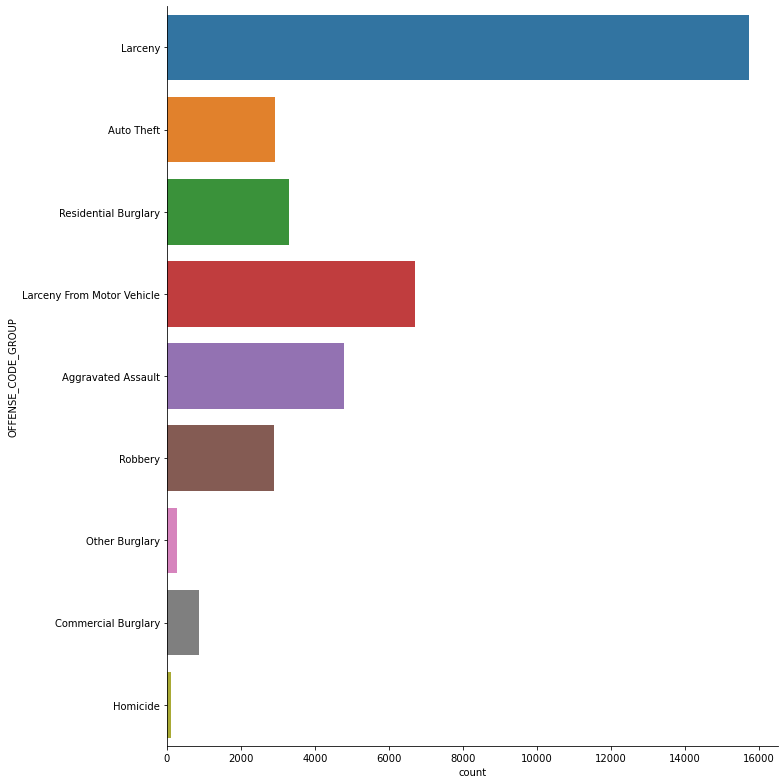

In [30]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height=11,
           aspect=1.0,
           order=df['OFFENSE_CODE_GROUP'].unique(),
           data=df)
plt.show()

# Occurance of series crimes per hour

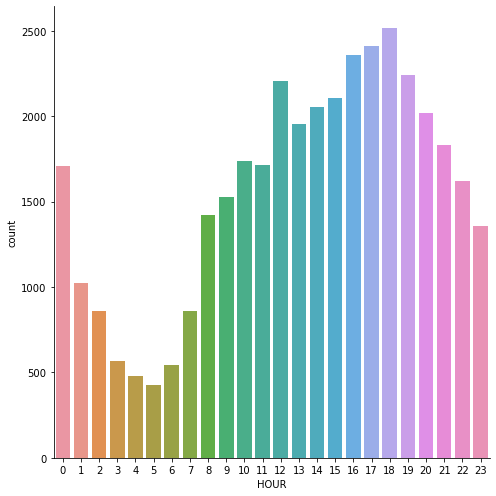

In [33]:
sns.catplot(x='HOUR',
           kind='count',
           height=7,
           aspect=1.0,
           data=df)
plt.show()

# Occurance of serious crimes by day of the week

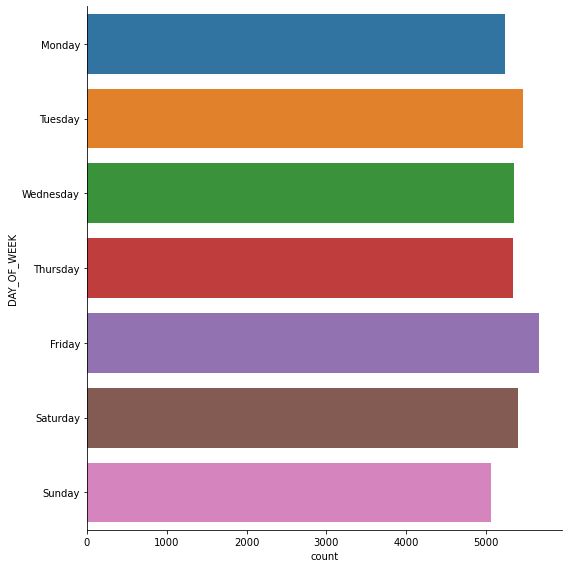

In [35]:
sns.catplot(y='DAY_OF_WEEK',
           kind='count',
           height=8,
           aspect=1.0,
           data=df)
plt.show()

# Add filter Larceny

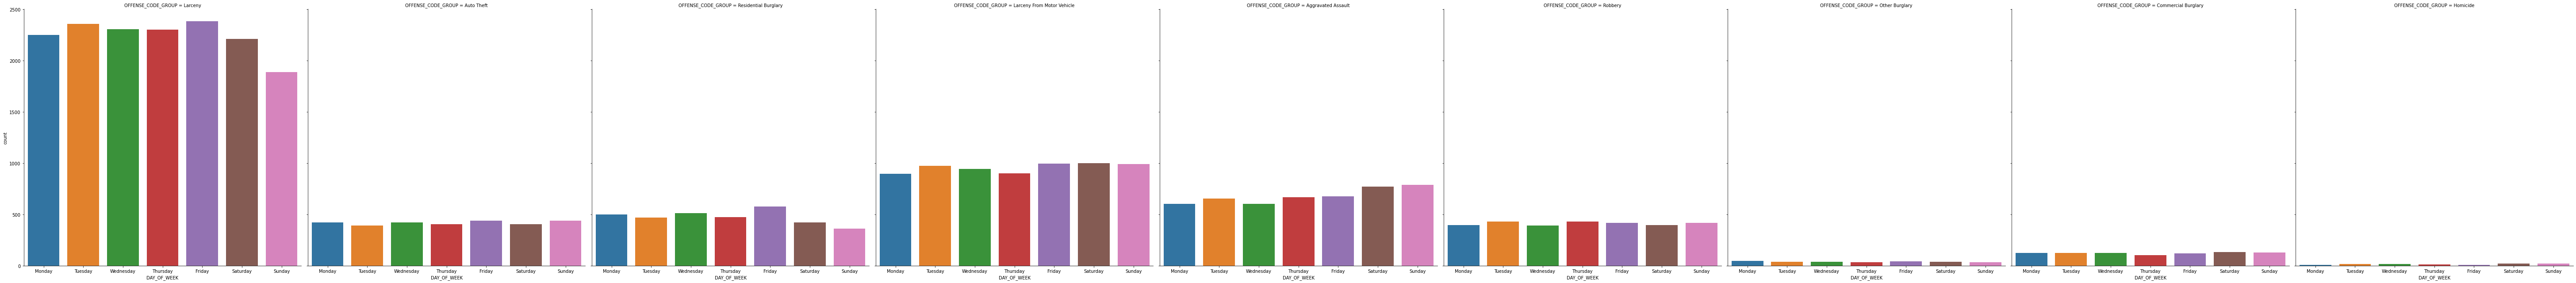

In [45]:
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
           height=9,
           aspect=1.0,
           data=df,
           col='OFFENSE_CODE_GROUP')
plt.show()